In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", color_codes=True, font_scale=1.5, rc={'figure.figsize':(22,8)}, palette='Set2', font='sans-serif', )

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Loading the dataset
df = pd.read_csv('/Users/srikrishna/Coding/final_year_project/Diabetes_Prediction_Model-main/Diabetes_Medical_Dataset(India).csv')

In [3]:
df.head(5)

Pregnancies  Age  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6   50      148             72             35        0  33.6   
1            1   31       85             66             29        0  26.6   
2            8   32      183             64              0        0  23.3   
3            1   21       89             66             23       94  28.1   
4            0   33      137             40             35      168  43.1   

   DiabetesPedigreeFunction Polyphagia Visual Blurring Obesity  Smoker  \
0                     0.627         No              No     Yes       1   
1                     0.351         No             Yes      No       1   
2                     0.672        Yes              No      No       0   
3                     0.167        Yes              No      No       0   
4                     2.288        Yes             Yes     Yes       0   

   High Cholestrol (HDL)  Diabetes Outcome  
0                      1                 1  
1                      0                 0  
2                      1                 1  
3                      0                 0  
4                      1                 1

In [4]:
df = df.rename(columns={'Diabetes Outcome':'DO'})

### Changing categorical values to int.

In [5]:
df['Polyphagia'] = df['Polyphagia'].map({'Yes':1 ,'No':0})
df['Visual Blurring'] = df['Visual Blurring'].map({'Yes':1 ,'No':0})
df['Obesity'] = df['Obesity'].map({'Yes':1 ,'No':0})

In [6]:
df.head()

Pregnancies  Age  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6   50      148             72             35        0  33.6   
1            1   31       85             66             29        0  26.6   
2            8   32      183             64              0        0  23.3   
3            1   21       89             66             23       94  28.1   
4            0   33      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Polyphagia  Visual Blurring  Obesity  Smoker  \
0                     0.627           0                0        1       1   
1                     0.351           0                1        0       1   
2                     0.672           1                0        0       0   
3                     0.167           1                0        0       0   
4                     2.288           1                1        1       0   

   High Cholestrol (HDL)  DO  
0                      1   1  
1                      0   0  
2                      1   1  
3                      0   0  
4                      1   1

In [7]:
df.columns

Index(['Pregnancies', 'Age', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Polyphagia',
       'Visual Blurring', 'Obesity', 'Smoker', 'High Cholestrol (HDL)', 'DO'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Age                       768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Polyphagia                768 non-null    int64  
 9   Visual Blurring           768 non-null    int64  
 10  Obesity                   768 non-null    int64  
 11  Smoker                    768 non-null    int64  
 12  High Cholestrol (HDL)     768 non-null    int64  
 13  DO                        768 non-null    int64  
dtypes: float64

In [9]:
df.describe()

Pregnancies         Age     Glucose  BloodPressure  SkinThickness  \
count   768.000000  768.000000  768.000000     768.000000     768.000000   
mean      3.845052   33.240885  120.894531      69.105469      20.536458   
std       3.369578   11.760232   31.972618      19.355807      15.952218   
min       0.000000   21.000000    0.000000       0.000000       0.000000   
25%       1.000000   24.000000   99.000000      62.000000       0.000000   
50%       3.000000   29.000000  117.000000      72.000000      23.000000   
75%       6.000000   41.000000  140.250000      80.000000      32.000000   
max      17.000000   81.000000  199.000000     122.000000      99.000000   

          Insulin         BMI  DiabetesPedigreeFunction  Polyphagia  \
count  768.000000  768.000000                768.000000  768.000000   
mean    79.799479   31.992578                  0.471876    0.432292   
std    115.244002    7.884160                  0.331329    0.495717   
min      0.000000    0.000000                  0.078000    0.000000   
25%      0.000000   27.300000                  0.243750    0.000000   
50%     30.500000   32.000000                  0.372500    0.000000   
75%    127.250000   36.600000                  0.626250    1.000000   
max    846.000000   67.100000                  2.420000    1.000000   

       Visual Blurring     Obesity      Smoker  High Cholestrol (HDL)  \
count       768.000000  768.000000  768.000000             768.000000   
mean          0.434896    0.169271    0.467448               0.528646   
std           0.496066    0.375235    0.499264               0.499504   
min           0.000000    0.000000    0.000000               0.000000   
25%           0.000000    0.000000    0.000000               0.000000   
50%           0.000000    0.000000    0.000000               1.000000   
75%           1.000000    0.000000    1.000000               1.000000   
max           1.000000    1.000000    1.000000               1.000000   

               DO  
count  768.000000  
mean     0.348958  
std      0.476951  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000

In [10]:
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Polyphagia                768.0    0.432292    0.495717   0.000   0.00000   
Visual Blurring           768.0    0.434896    0.496066   0.000   0.00000   
Obesity                   768.0    0.169271    0.375235   0.000   0.00000   
Smoker                    768.0    0.467448    0.499264   0.000   0.00000   
High Cholestrol (HDL)     768.0    0.528646    0.499504   0.000   0.00000   
DO                        768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Age                        29.0000   41.00000   81.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Polyphagia                  0.0000    1.00000    1.00  
Visual Blurring             0.0000    1.00000    1.00  
Obesity                     0.0000    0.00000    1.00  
Smoker                      0.0000    1.00000    1.00  
High Cholestrol (HDL)       1.0000    1.00000    1.00  
DO                          0.0000    1.00000    1.00

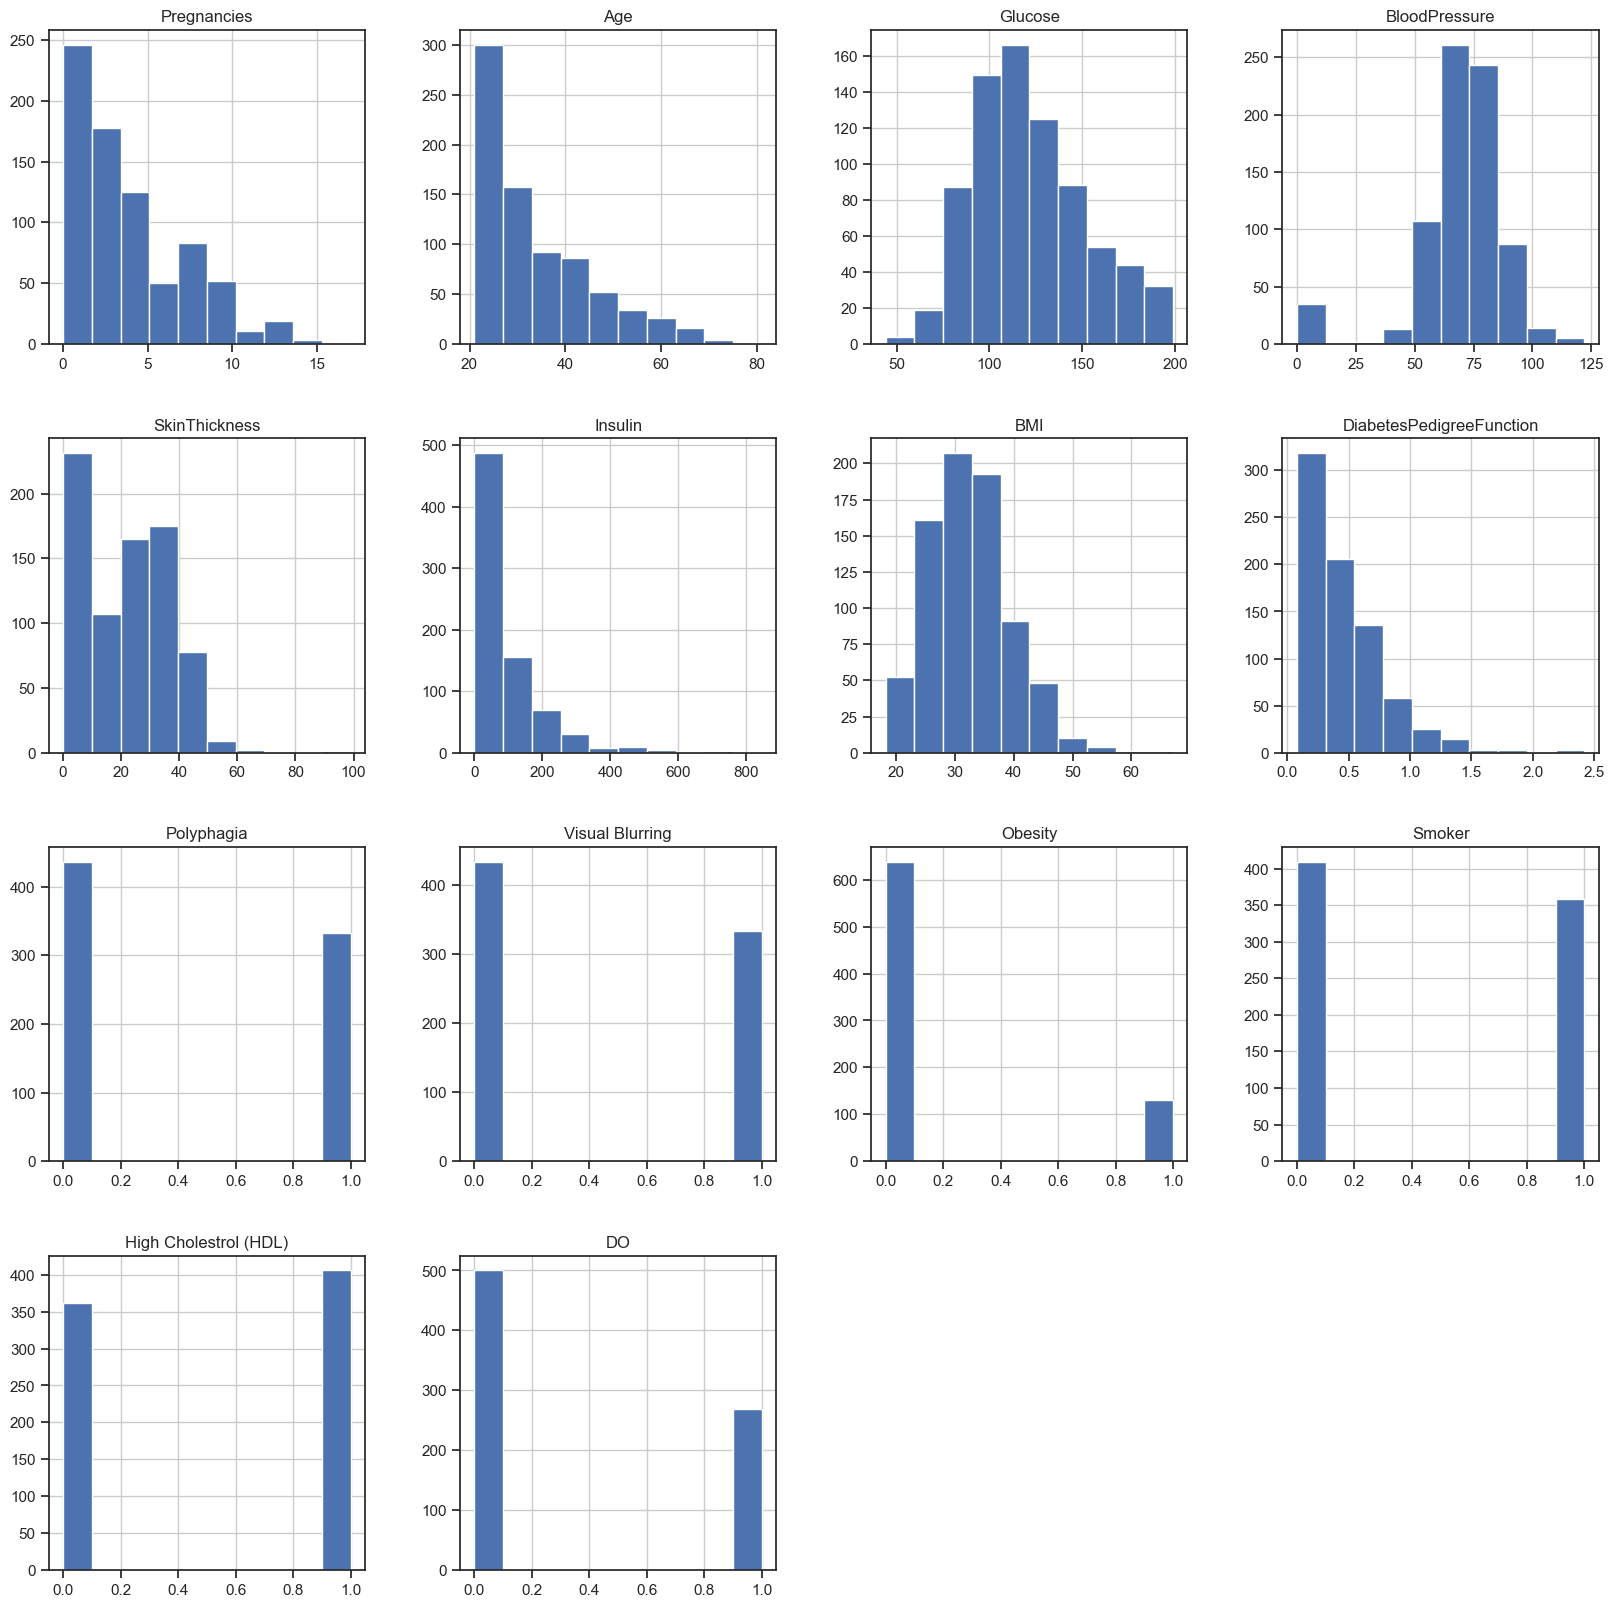

In [142]:
p = df.hist(figsize = (20,20))

In [12]:
# Showing the Count of NANs
print(df.isnull().sum())

Pregnancies                 0
Age                         0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Polyphagia                  0
Visual Blurring             0
Obesity                     0
Smoker                      0
High Cholestrol (HDL)       0
DO                          0
dtype: int64


### Filling not available values with mean

In [97]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['Glucose'].replace(0, df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)
df['BMI'].replace(0, df['BMI'].mean(), inplace = True)
df['Smoker'].fillna(df['Smoker'].median(), inplace = True)
df['High Cholestrol (HDL)'].fillna(df['High Cholestrol (HDL)'].median(), inplace = True)

## Studying the corelation

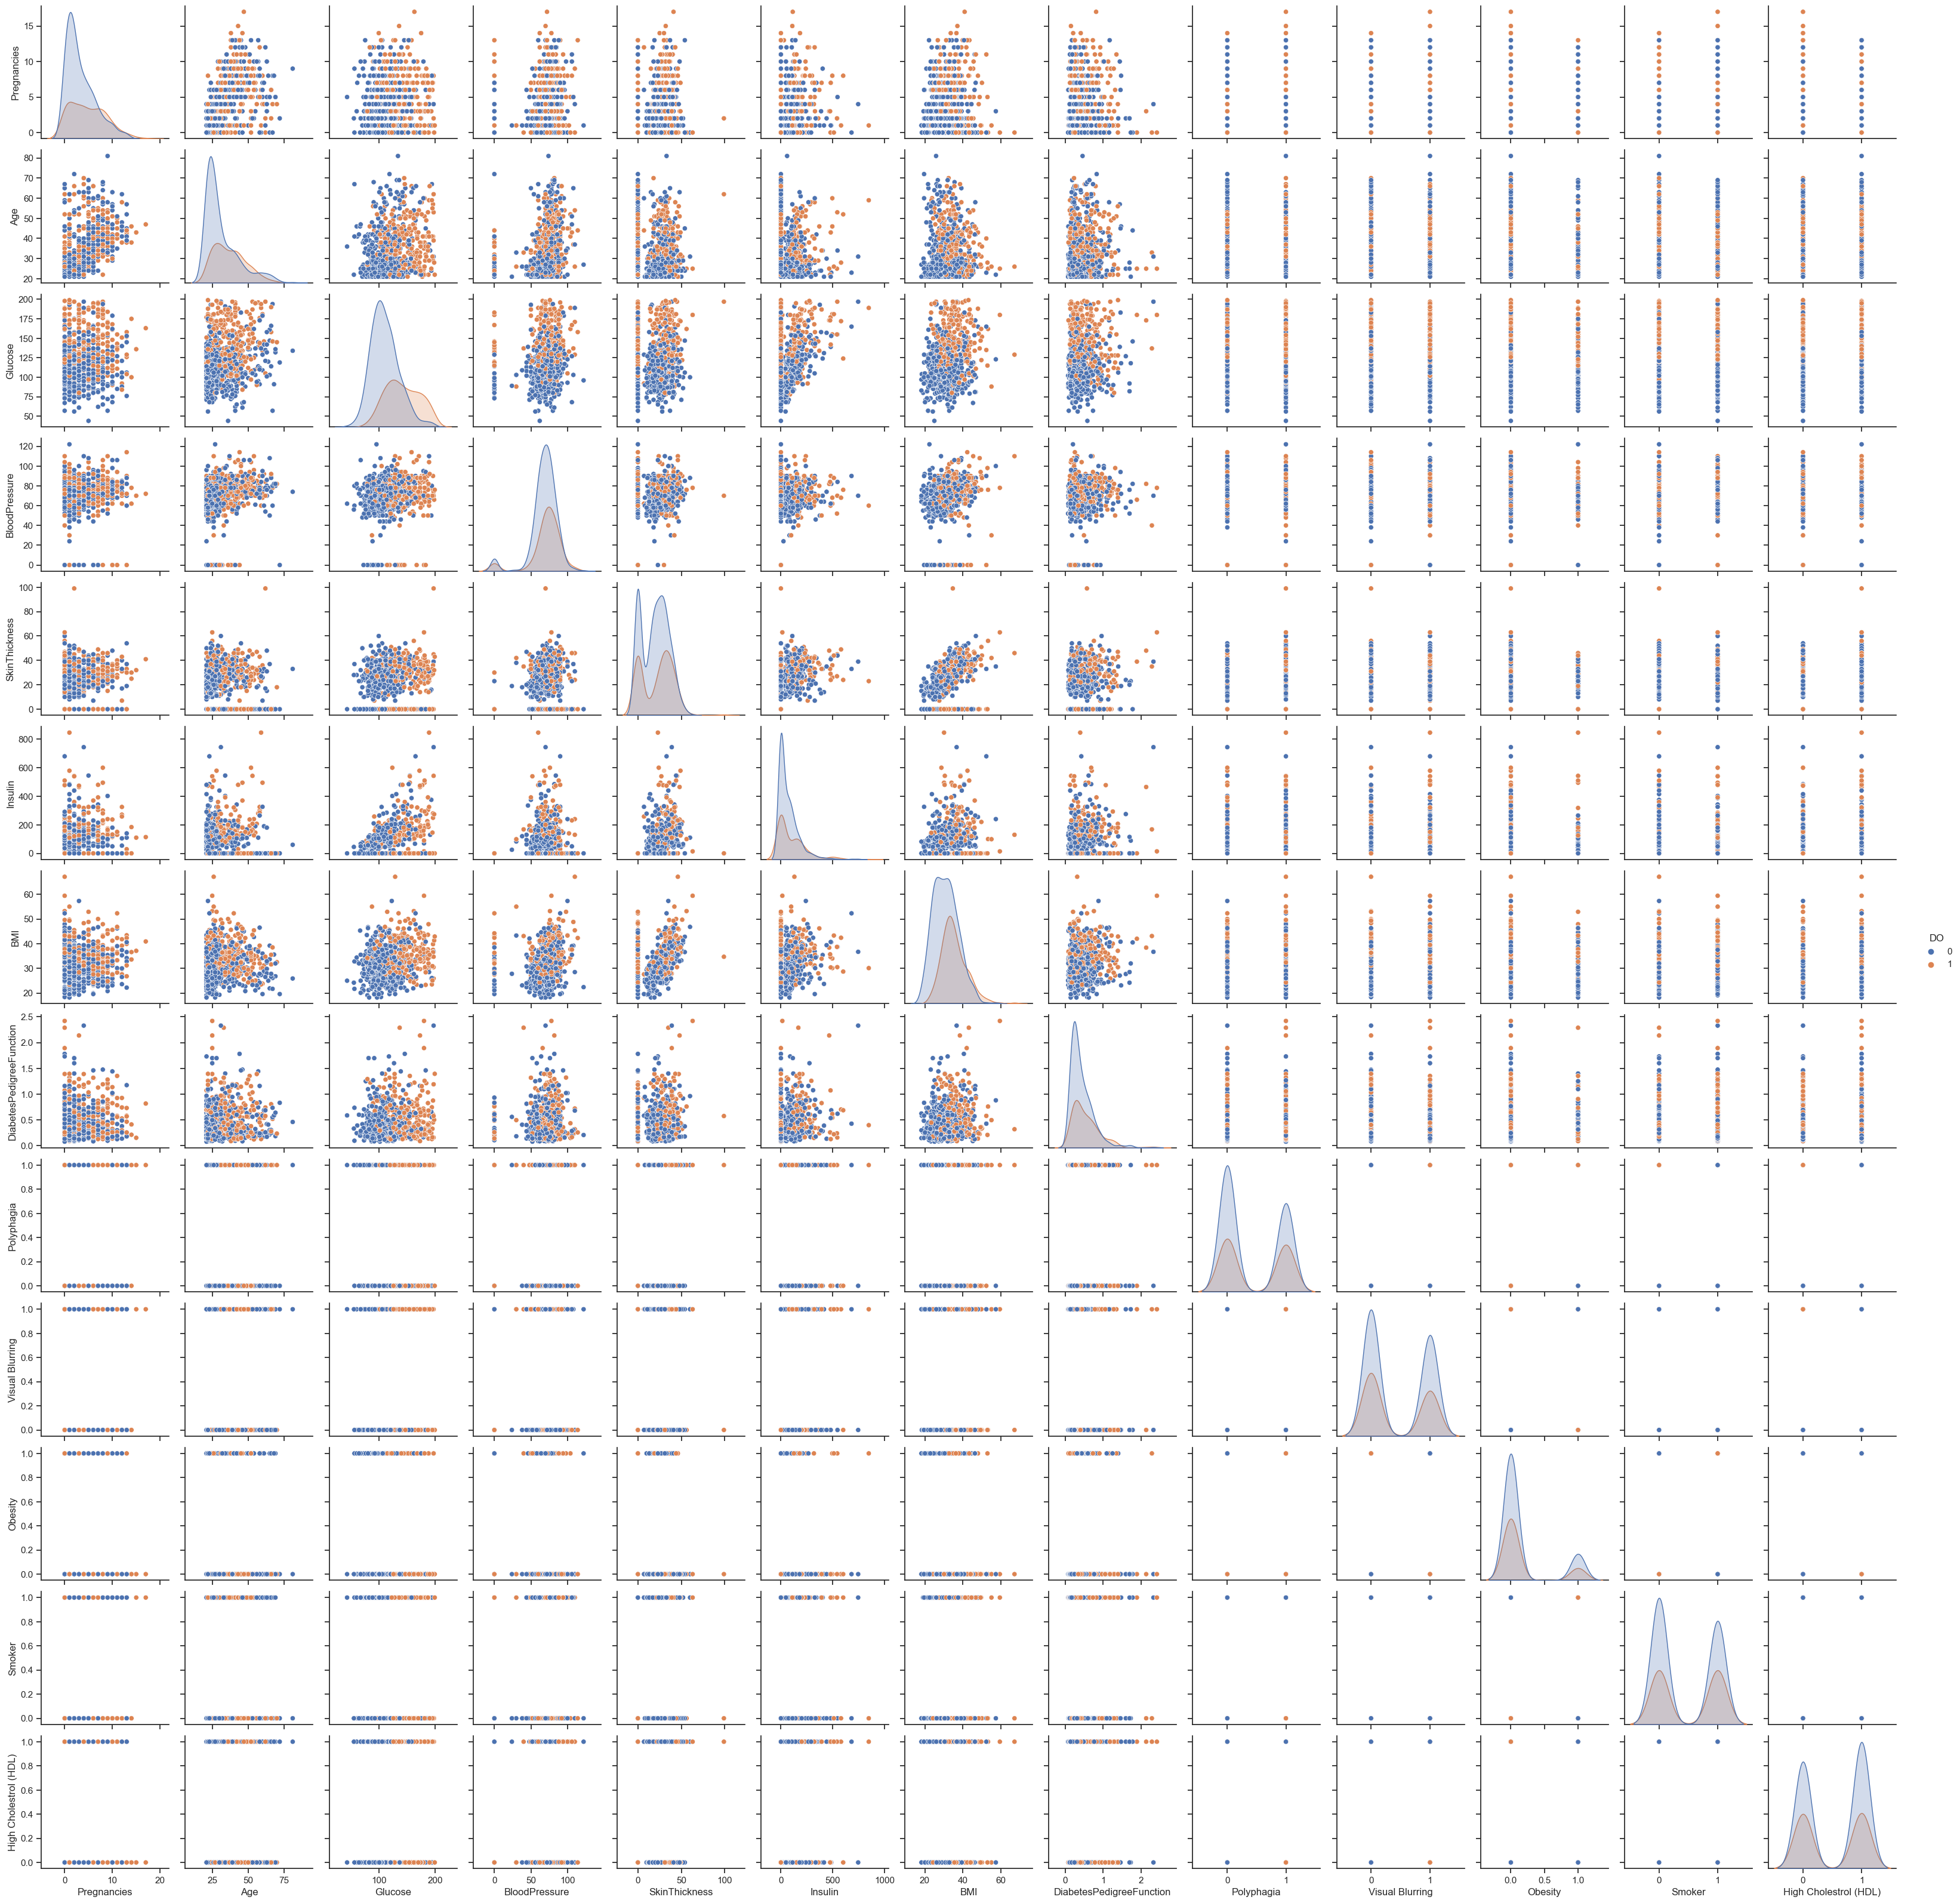

In [98]:
sns.pairplot(df, hue='DO')

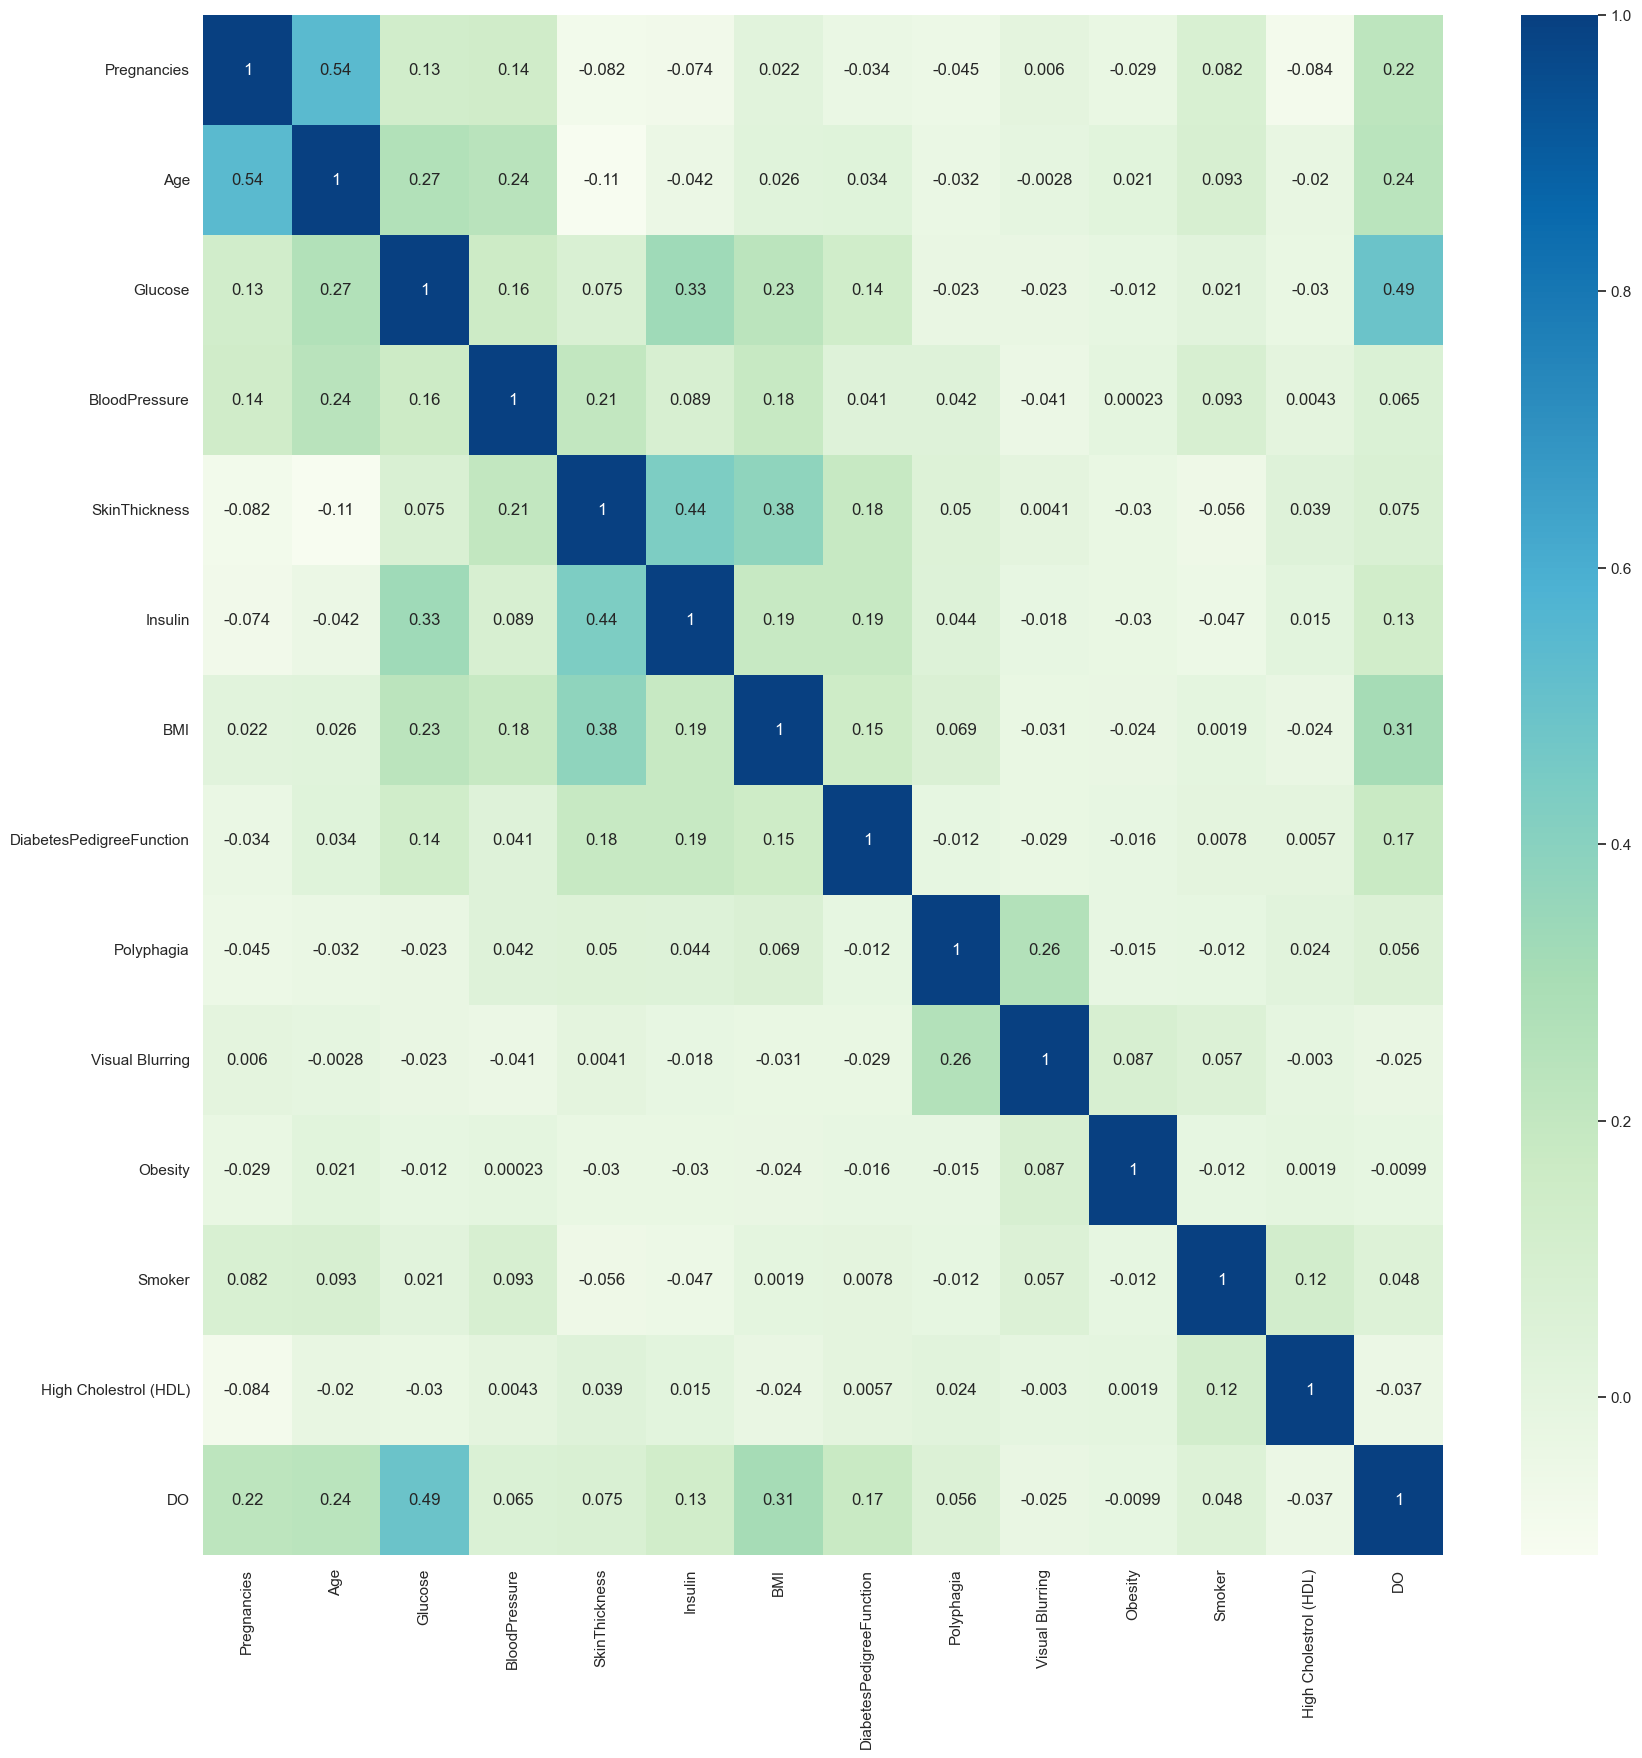

In [99]:
plt.figure(figsize=(20, 20))
# seaborn has an easy method to showcase heatmap
sns.set_theme(style="darkgrid")
p = sns.heatmap(df.corr(), annot=True,cmap ='GnBu')

<AxesSubplot:>

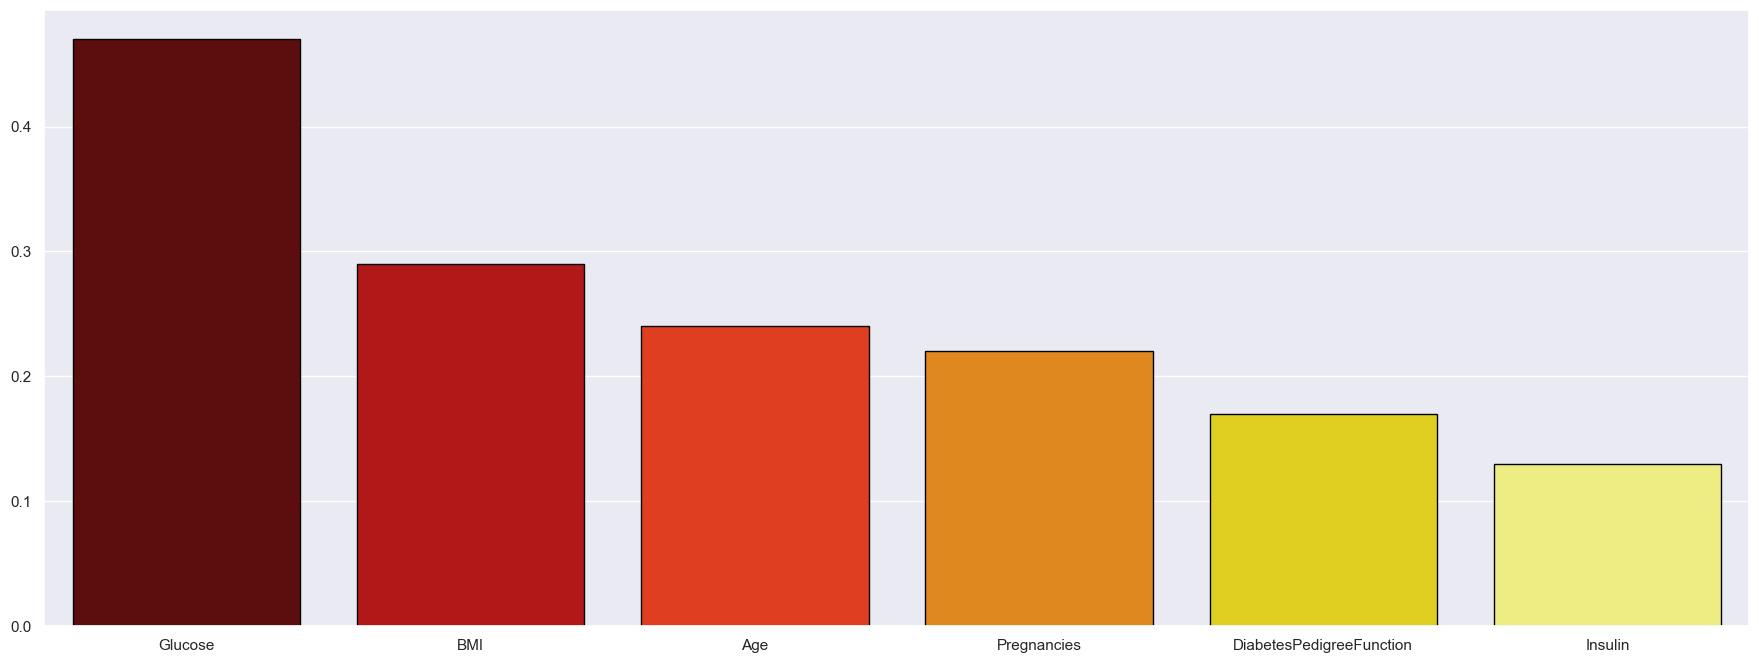

In [101]:
corr = {'Glucose' : 0.47, 'BMI' : 0.29, 'Age' : 0.24, 'Pregnancies' : 0.22, 'DiabetesPedigreeFunction' : 0.17, 'Insulin' : 0.13}
plt.figure(figsize=(22, 8))
sns.barplot(x=list(corr.keys()), y=list(corr.values()), palette='hot', edgecolor='black', linewidth=1)

### We have to consider colums only which have higher corelation.

## Studying the output

0    500
1    268
Name: DO, dtype: int64


<AxesSubplot:ylabel='DO'>

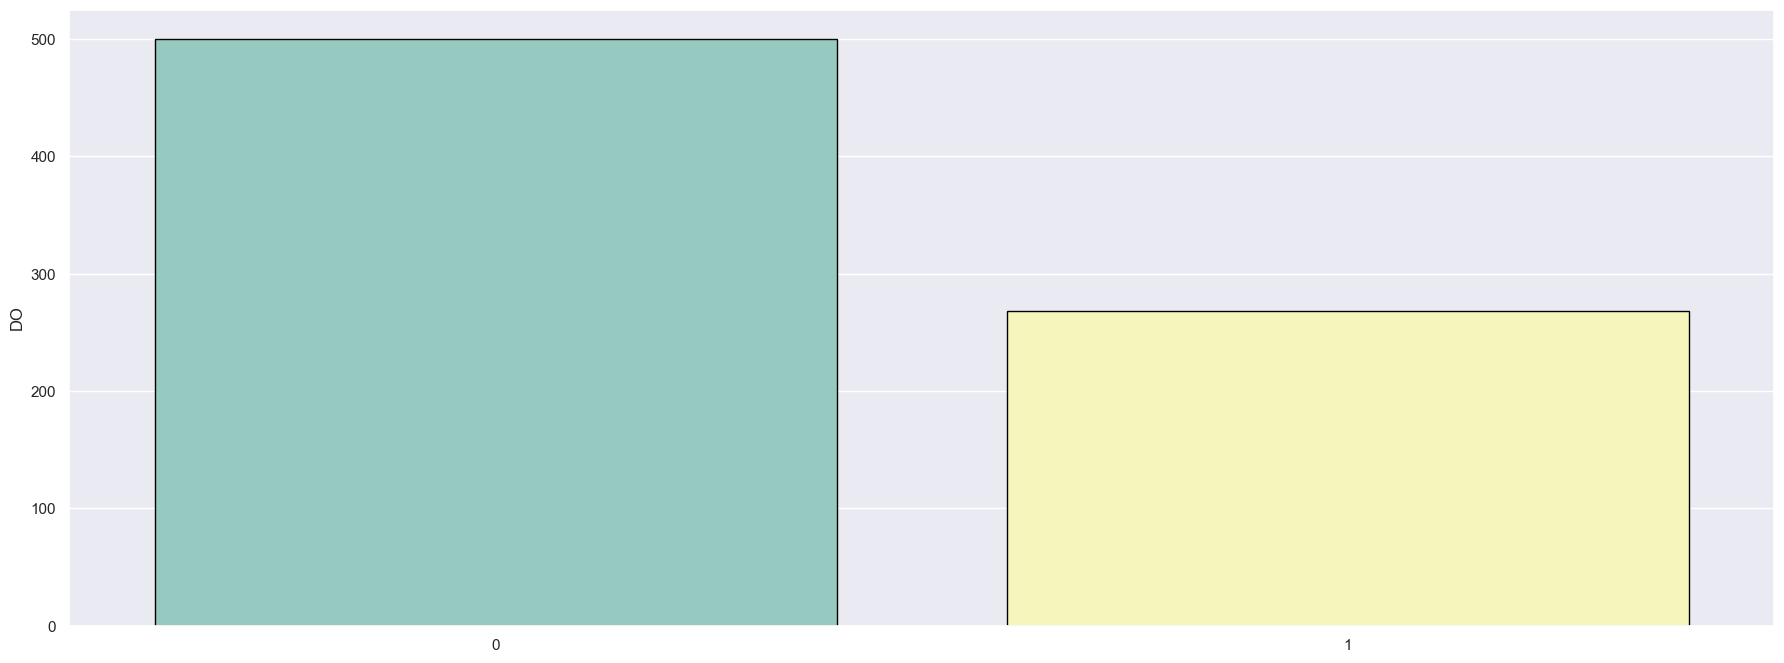

In [102]:
print(df.DO.value_counts())
sns.barplot(df.DO.value_counts().index, df.DO.value_counts(), palette="Set3", edgecolor='black', linewidth=1)

## Creating new dataset for the model building.

In [103]:
df_copy = df[['Age', 'Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'DO']].copy(deep=True)
df_copy.head()

Age  Pregnancies  Glucose  Insulin   BMI  DiabetesPedigreeFunction  DO
0   50            6    148.0        0  33.6                     0.627   1
1   31            1     85.0        0  26.6                     0.351   0
2   32            8    183.0        0  23.3                     0.672   1
3   21            1     89.0       94  28.1                     0.167   0
4   33            0    137.0      168  43.1                     2.288   1

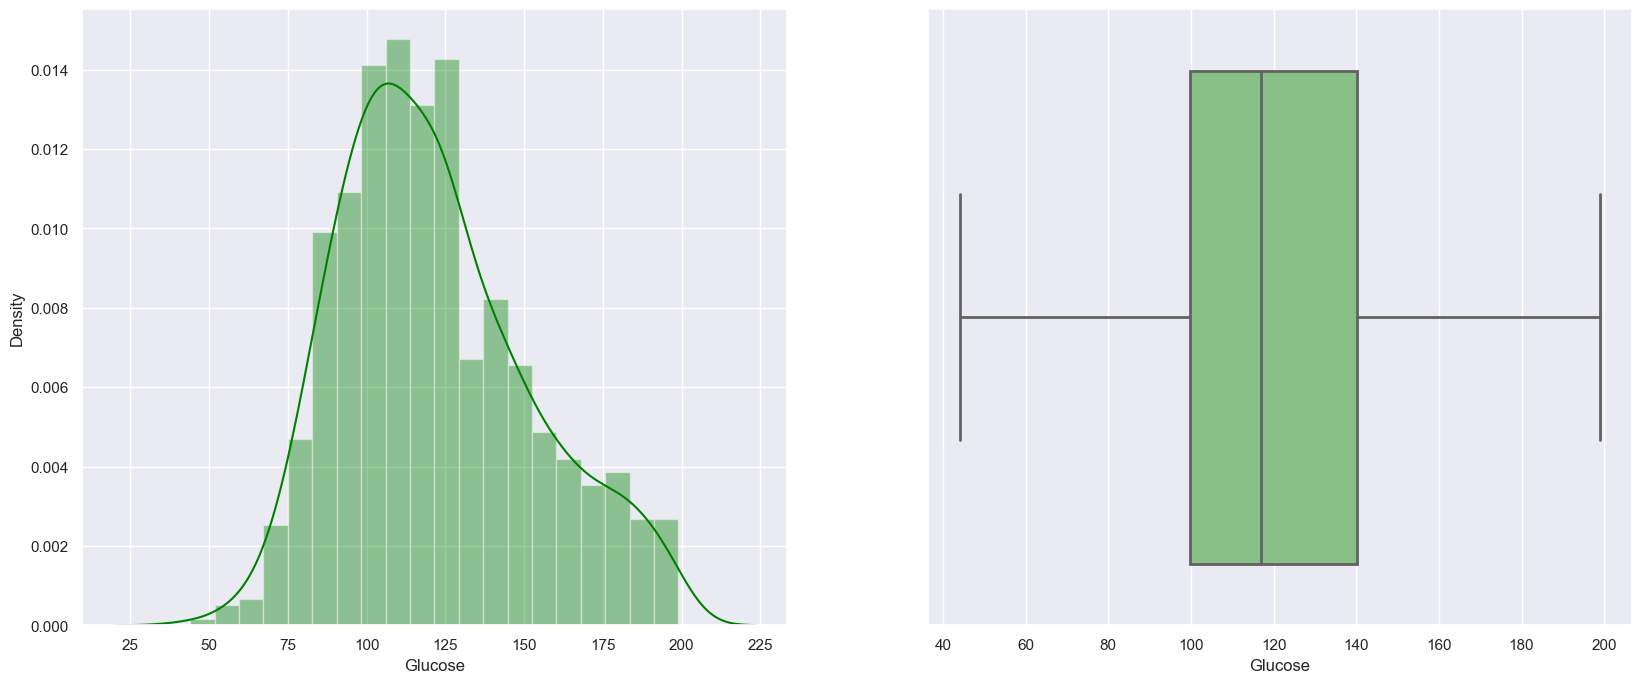

In [104]:
plt.figure(figsize=(20, 8))
plt.subplot(121), sns.distplot(df_copy['Glucose'], kde=True, color='green', bins=20, hist_kws={'alpha': 0.4})
plt.subplot(122), sns.boxplot(df_copy['Glucose'], palette='Accent', linewidth=2)
plt.show()

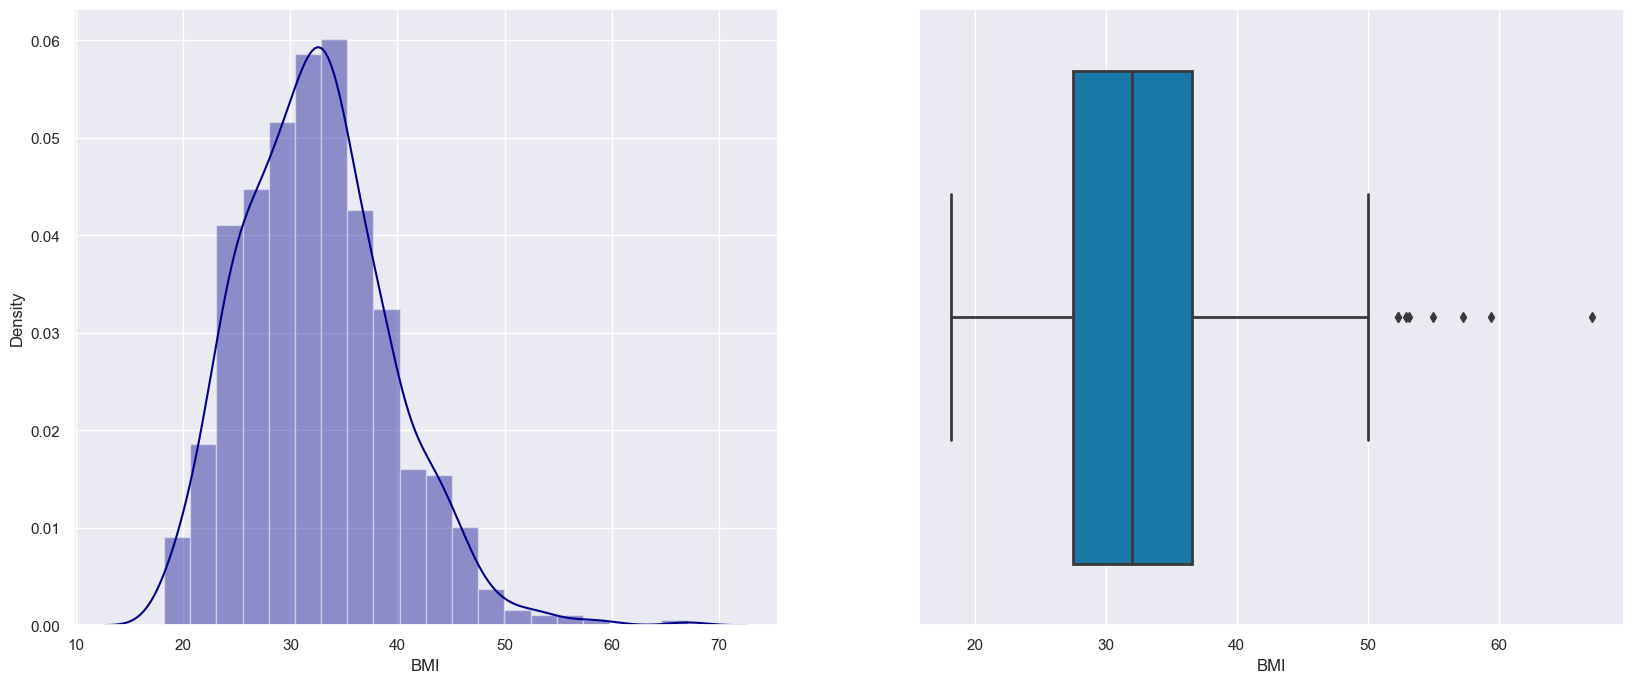

In [107]:
plt.figure(figsize=(20, 8))
plt.subplot(121), sns.distplot(df_copy['BMI'], kde=True, color='darkblue', bins=20, hist_kws={'alpha': 0.4})
plt.subplot(122), sns.boxplot(df_copy['BMI'], palette='winter', linewidth=2)
plt.show()

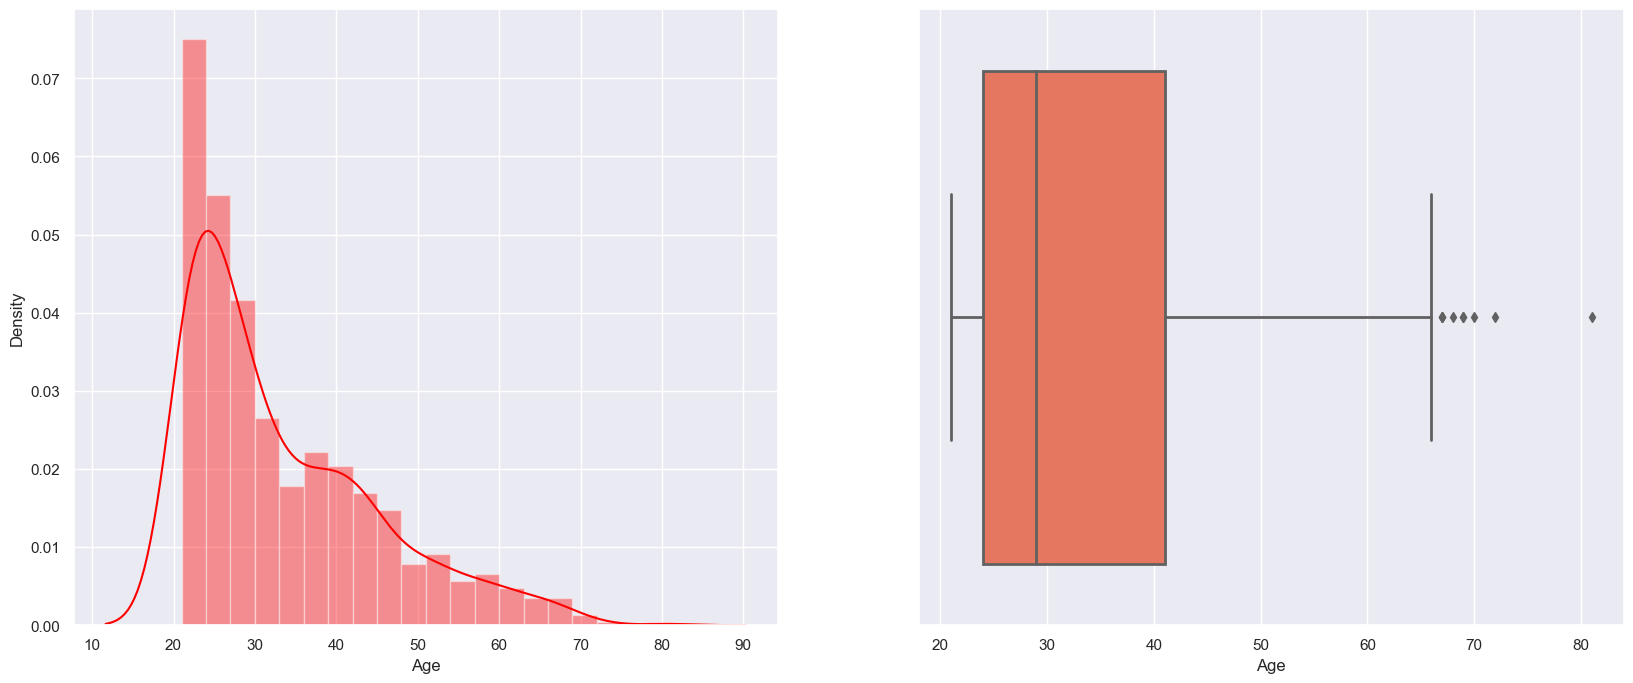

In [108]:
plt.figure(figsize=(20, 8))
plt.subplot(121), sns.distplot(df_copy['Age'], kde=True, color='Red', bins=20, hist_kws={'alpha': 0.4})
plt.subplot(122), sns.boxplot(df_copy['Age'], palette='Reds', linewidth=2)
plt.show()

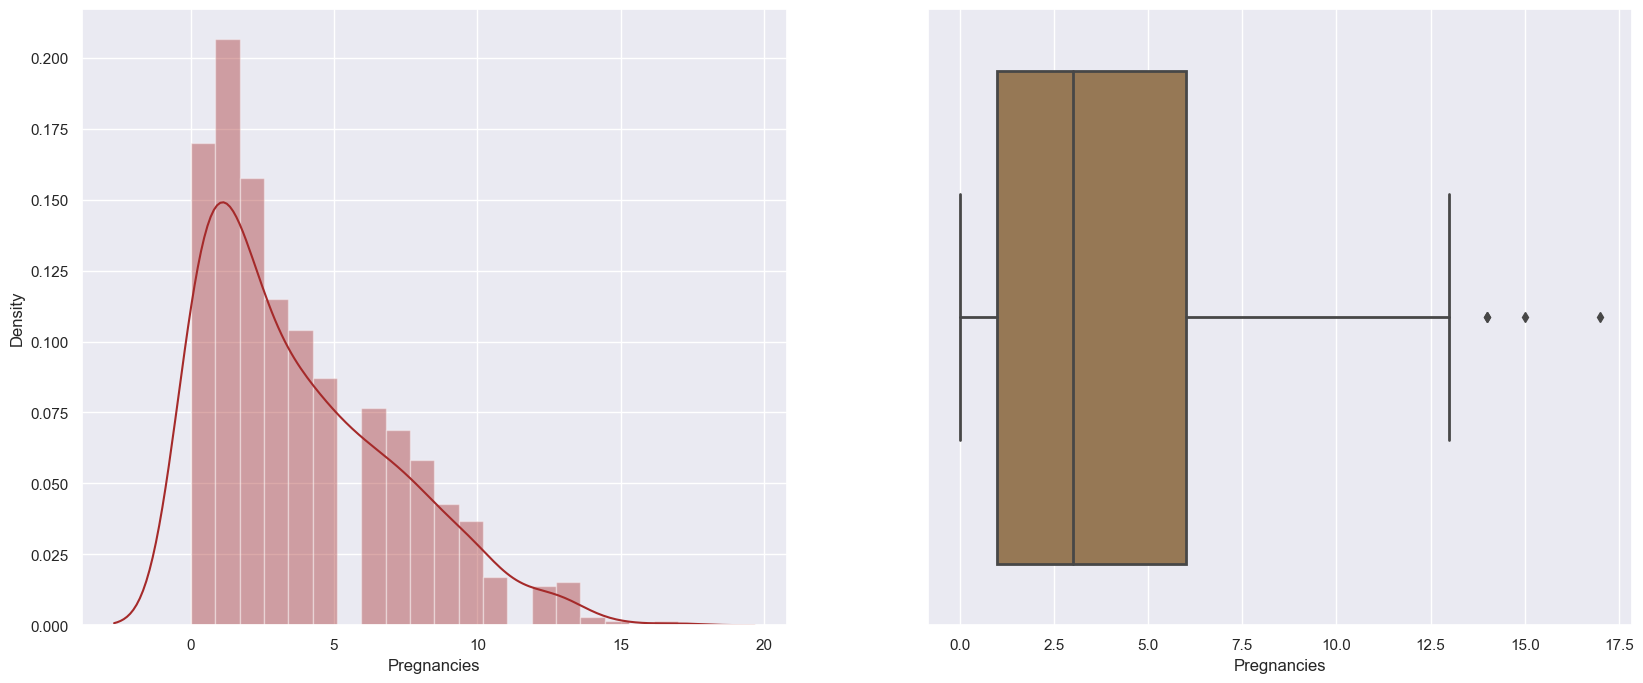

In [109]:
plt.figure(figsize=(20, 8))
plt.subplot(121), sns.distplot(df_copy['Pregnancies'], kde=True, color='brown', bins=20, hist_kws={'alpha': 0.4})
plt.subplot(122), sns.boxplot(df_copy['Pregnancies'], palette='cubehelix', linewidth=2)
plt.show()

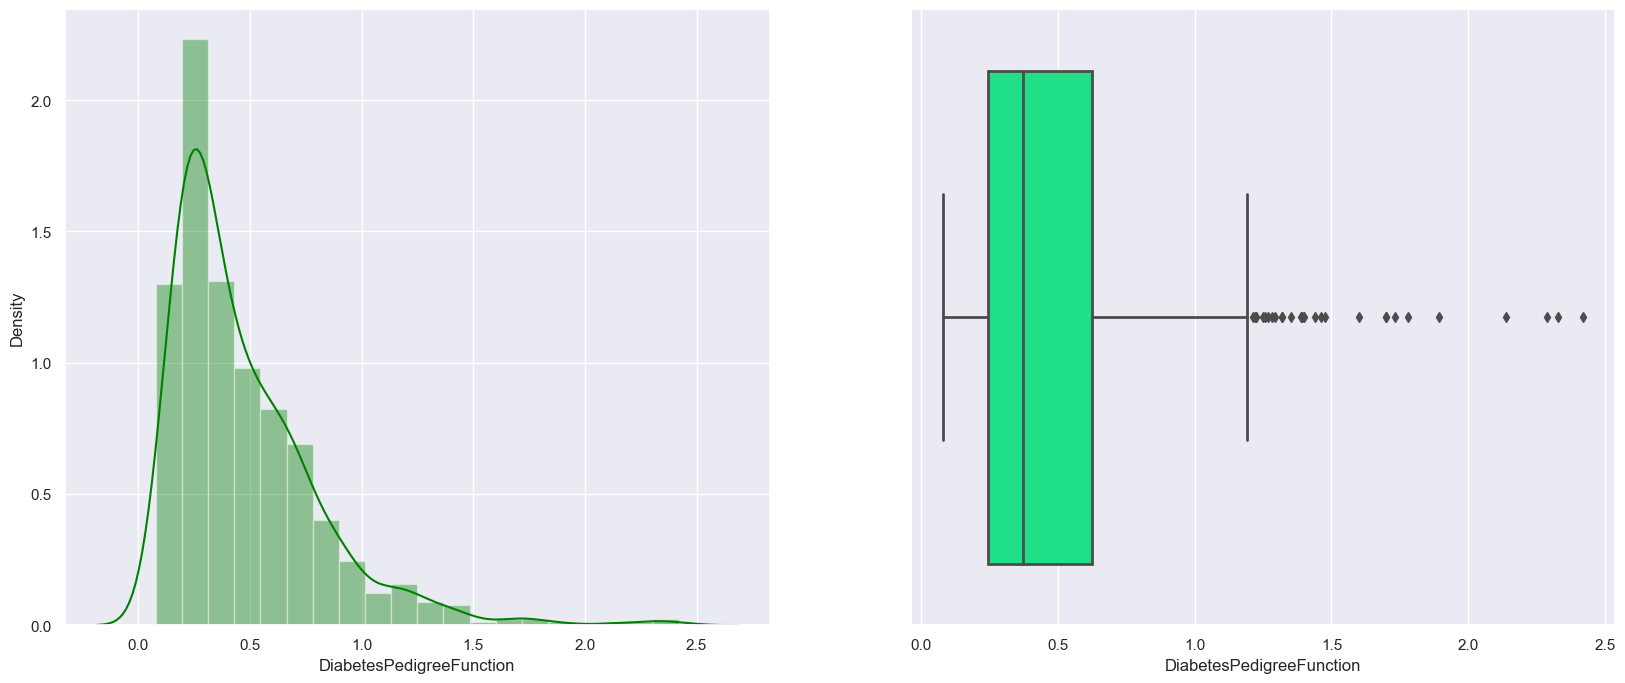

In [110]:
plt.figure(figsize=(20, 8))
plt.subplot(121), sns.distplot(df_copy['DiabetesPedigreeFunction'], kde=True, color='green', bins=20)
plt.subplot(122), sns.boxplot(df_copy['DiabetesPedigreeFunction'], palette='gist_rainbow', linewidth=2)
plt.show()

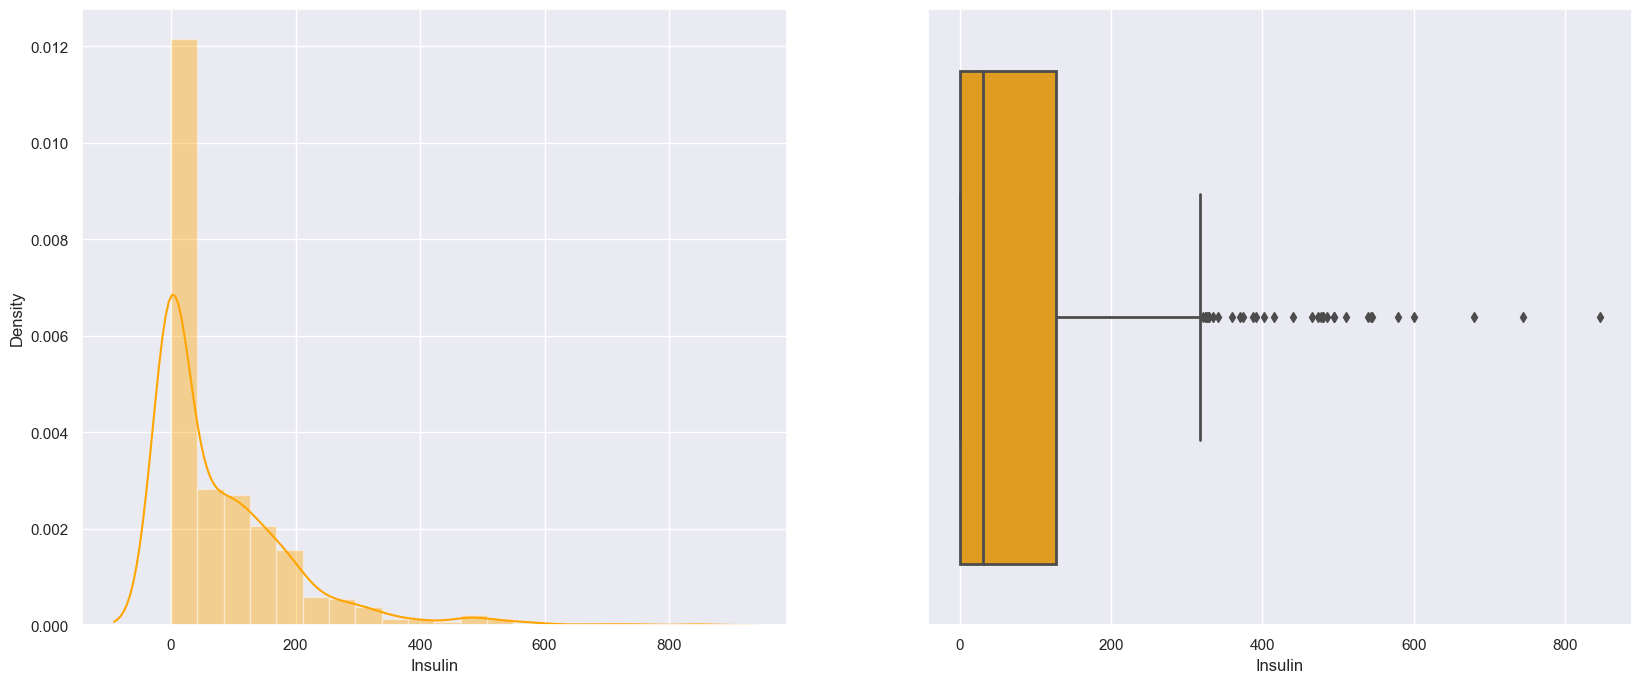

In [111]:
plt.figure(figsize=(20, 8))
plt.subplot(121), sns.distplot(df_copy['Insulin'], kde=True, color='orange', bins=20, hist_kws={'alpha': 0.4})
plt.subplot(122), sns.boxplot(df_copy['Insulin'], color='orange', linewidth=2)
plt.show()

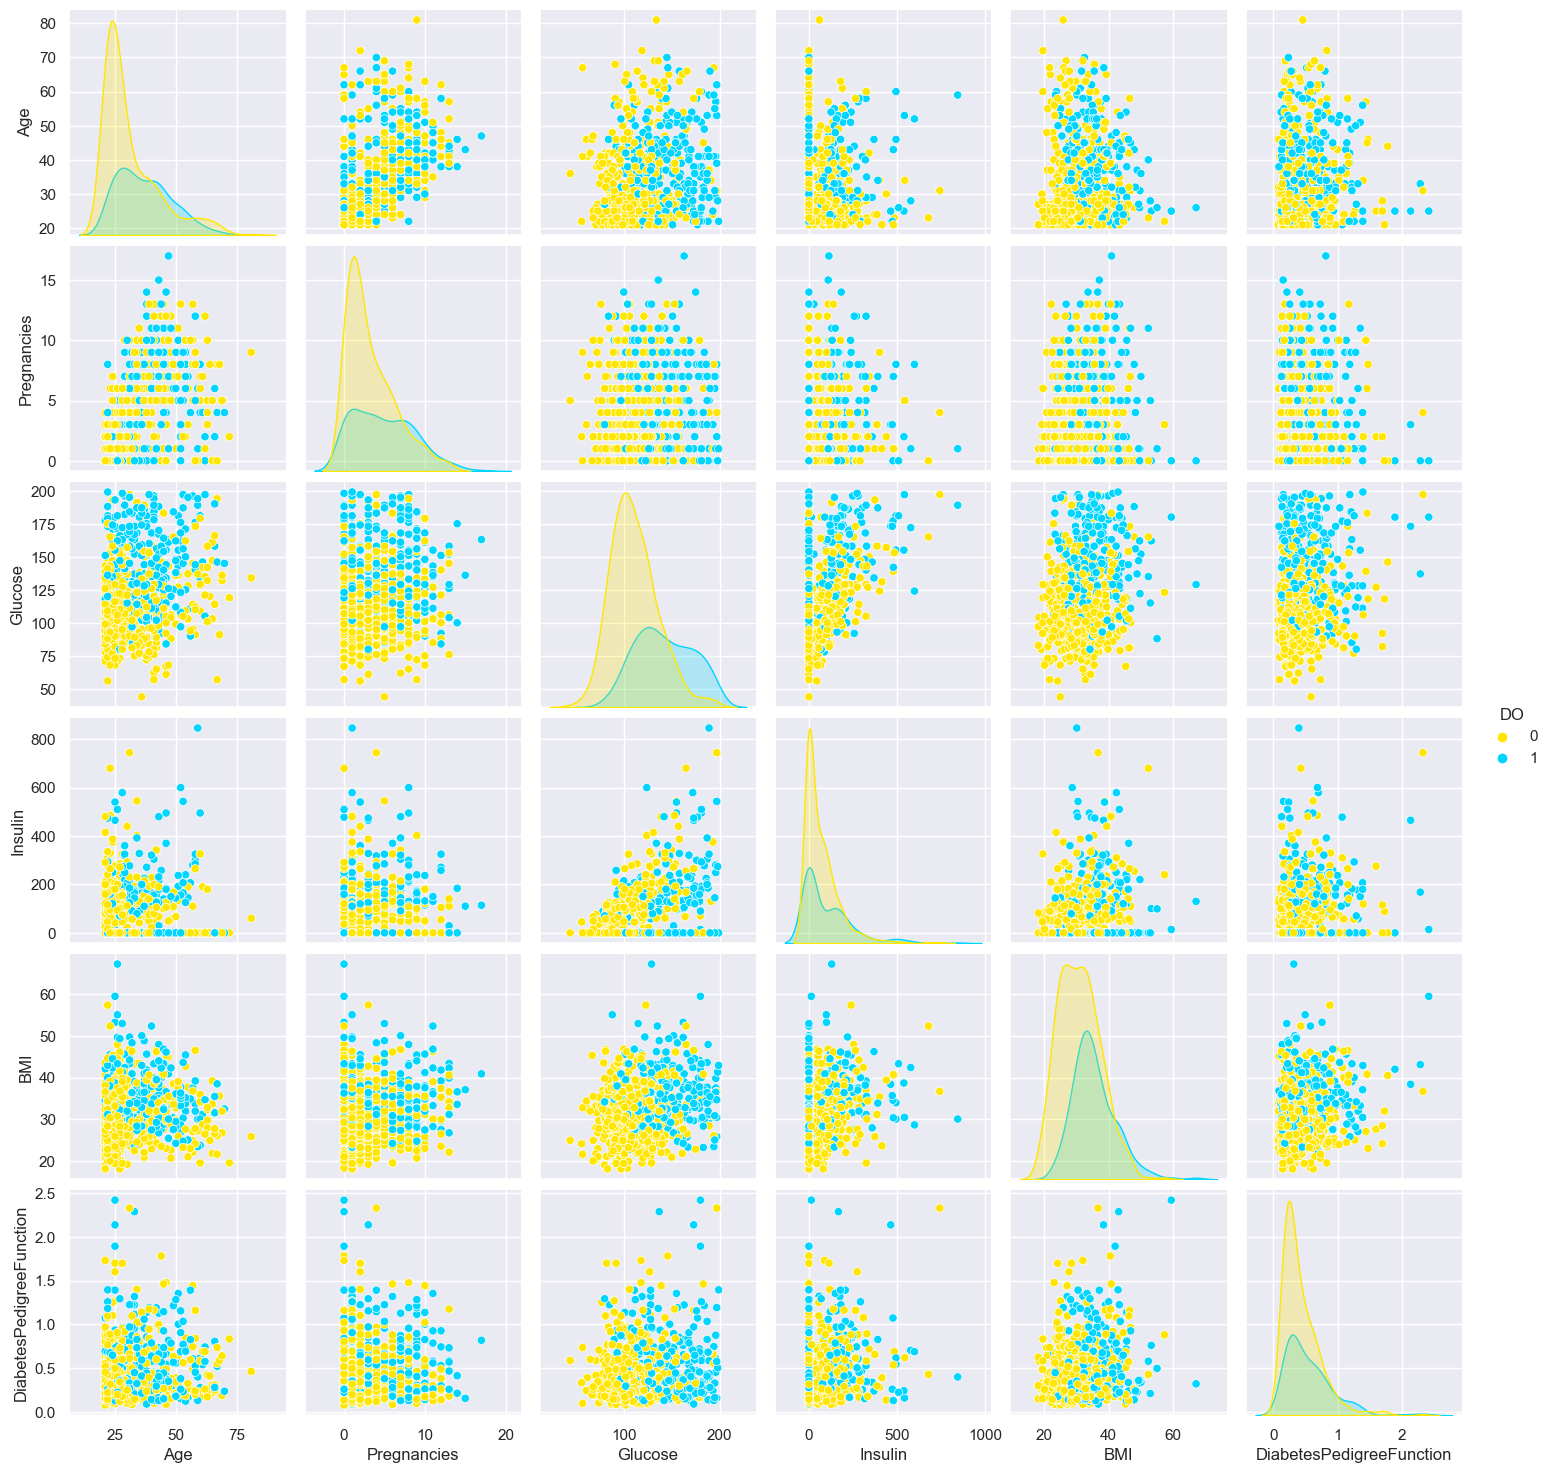

In [112]:
sns.pairplot(df_copy, hue='DO', palette='jet_r')

In [113]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df_copy.drop(["DO"],axis = 1),), columns=['Age', 'Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction'])
X.head()

Age  Pregnancies   Glucose   Insulin       BMI  \
0  1.425995     0.639947  0.865276 -0.692891  0.167255   
1 -0.190672    -0.844885 -1.205989 -0.692891 -0.851535   
2 -0.105584     1.233880  2.015979 -0.692891 -1.331821   
3 -1.041549    -0.844885 -1.074480  0.123302 -0.633222   
4 -0.020496    -1.141852  0.503626  0.765836  1.549899   

   DiabetesPedigreeFunction  
0                  0.468492  
1                 -0.365061  
2                  0.604397  
3                 -0.920763  
4                  5.484909

In [114]:
y = df_copy.DO
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: DO, Length: 768, dtype: int64

# **MODEL BUILDING** <br>
*Splitting the dataset* <br>

In [115]:
X = df_copy.drop('DO', axis=1, inplace=False)
y = df_copy['DO']

Now we will split the data into training and testing data using the train_test_split function

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,
                                                    random_state=7)

In [171]:
accur = {}

# **Random Forest**
Building the model using RandomForest

In [118]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

Now after building the model let’s check the accuracy of the model on the training dataset.

In [172]:
rfc_train = rfc.predict(X_train)
from sklearn import metrics
predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))
accur.update({'Random Forest': metrics.accuracy_score(y_test, predictions)})

Accuracy_Score = 0.8740157480314961


Classification report and confusion matrix of random forest model.

In [120]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[130  32]
 [ 31  61]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       162
           1       0.66      0.66      0.66        92

    accuracy                           0.75       254
   macro avg       0.73      0.73      0.73       254
weighted avg       0.75      0.75      0.75       254



# Decision Tree
Building the model using DecisionTree

In [121]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

Now we will be making the predictions on the testing data directly as it is of more importance.

Getting the accuracy score for Decision Tree

In [173]:
from sklearn import metrics

predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))
accur.update({'Decision Tree' : metrics.accuracy_score(y_test, predictions)})

Accuracy Score = 0.7204724409448819


Classification report and confusion matrix of the decision tree model.

In [123]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[124  38]
 [ 33  59]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       162
           1       0.61      0.64      0.62        92

    accuracy                           0.72       254
   macro avg       0.70      0.70      0.70       254
weighted avg       0.72      0.72      0.72       254



# **Support Vector Machine (SVM)**
Building the model using Support Vector Machine (SVM)

In [124]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

Prediction from support vector machine model on the testing data

In [125]:
svc_pred = svc_model.predict(X_test)

Accuracy score for SVM

In [174]:
from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))
accur.update({'SVM' : metrics.accuracy_score(y_test, svc_pred)})


Accuracy Score = 0.7637795275590551


Classification report and confusion matrix of the SVM classifier.

In [127]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

[[148  14]
 [ 46  46]]
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       162
           1       0.77      0.50      0.61        92

    accuracy                           0.76       254
   macro avg       0.76      0.71      0.72       254
weighted avg       0.76      0.76      0.75       254



# Logistic Regression

In [175]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
accur.update({'Logistic Regression' : accuracy})

Accuracy: 0.7755905511811023


{'Random Forest': 87.4, 'Decision Tree': 72.05, 'SVM': 76.38, 'Logistic Regression': 77.56}


[Text(0, 0, '87.40'),
 Text(0, 0, '72.05'),
 Text(0, 0, '76.38'),
 Text(0, 0, '77.56')]

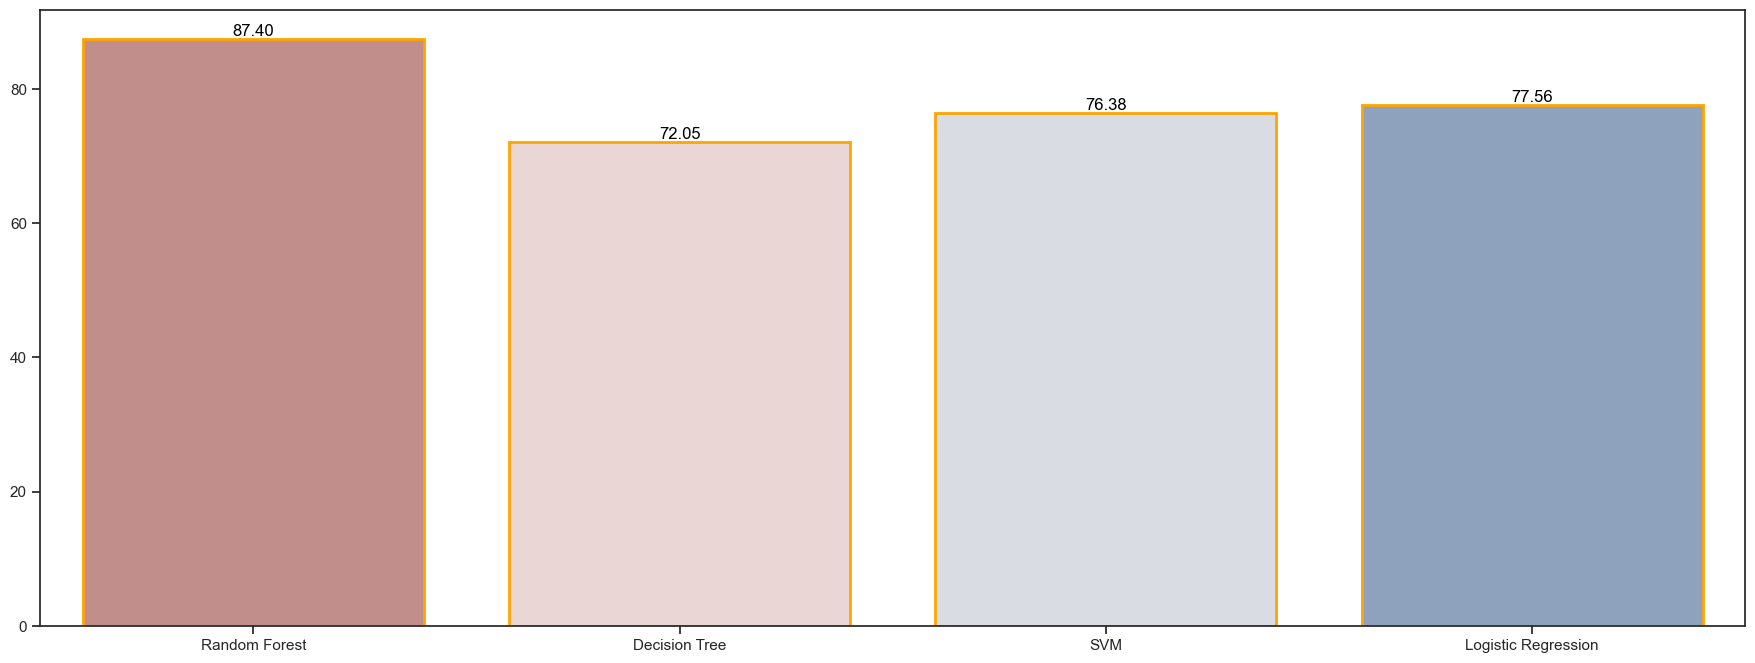

In [176]:
for k in accur.keys():
    accur[k] = round(accur[k]*100, 2)
print(accur)
plt.figure(figsize=(22, 8))
sns.set_theme(style="ticks")
bar = sns.barplot(x=list(accur.keys()), y=list(accur.values()) , palette='vlag_r', edgecolor='orange', linewidth=2)
bar.bar_label(bar.containers[0], fmt='%.2f', label_type='edge', color='black')